In [1]:
#Hugging Face's Transformers library
!pip install transformers


In [2]:
#Install Pytorch
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install transformers[torch]


Looking in indexes: https://download.pytorch.org/whl/cpu
zsh:1: no matches found: transformers[torch]


In [3]:
!pip install accelerate -U
!pip install --upgrade accelerate
!pip install --upgrade transformers


In [4]:
import pandas as pd
import re
from sklearn.utils import resample


Preprocess the Dataset

Load the dataset and clean it to ensure proper formatting.

In [5]:


# Load the dataset
data = pd.read_json('/Users/feras/repos/news-categorizer-training/Dataset/News_Category_Dataset_v3.json', lines=True)

# Select the relevant columns
data = data[['category', 'headline', 'short_description']]

# Combine 'headline' and 'short_description' into a single text column
data['text'] = data['headline'] + " " + data['short_description']

# Drop rows with missing values
data.dropna(subset=['text', 'category'], inplace=True)

# Display a sample of the data
print(data.head())

print(data.iloc[0]['headline'])
print(data.iloc[0]['short_description'])
print(data.iloc[0]['text'])


    category                                           headline  \
0  U.S. NEWS  Over 4 Million Americans Roll Up Sleeves For O...   
1  U.S. NEWS  American Airlines Flyer Charged, Banned For Li...   
2     COMEDY  23 Of The Funniest Tweets About Cats And Dogs ...   
3  PARENTING  The Funniest Tweets From Parents This Week (Se...   
4  U.S. NEWS  Woman Who Called Cops On Black Bird-Watcher Lo...   

                                   short_description  \
0  Health experts said it is too early to predict...   
1  He was subdued by passengers and crew when he ...   
2  "Until you have a dog you don't understand wha...   
3  "Accidentally put grown-up toothpaste on my to...   
4  Amy Cooper accused investment firm Franklin Te...   

                                                text  
0  Over 4 Million Americans Roll Up Sleeves For O...  
1  American Airlines Flyer Charged, Banned For Li...  
2  23 Of The Funniest Tweets About Cats And Dogs ...  
3  The Funniest Tweets From Parents This

Exploratory Data Analysis

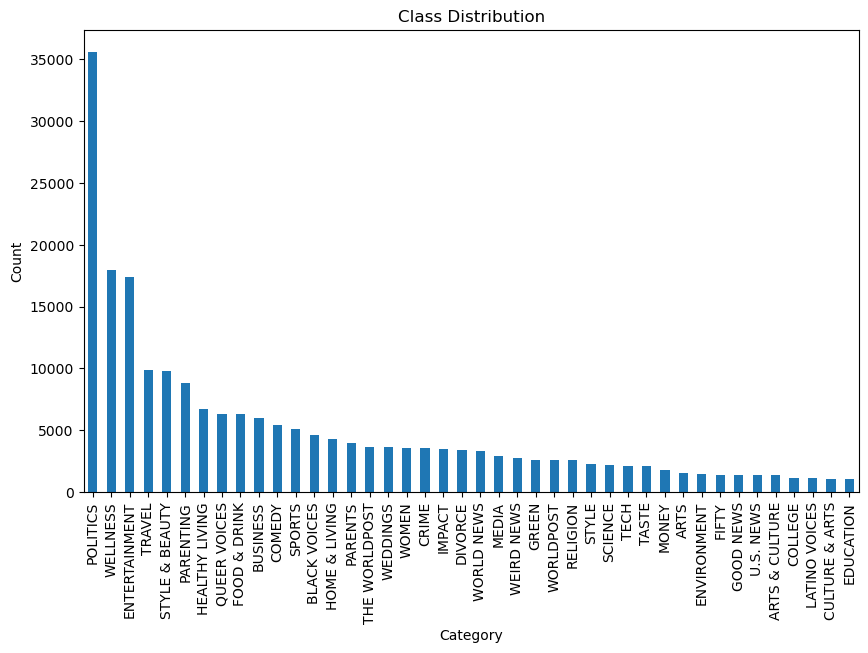

In [6]:
import matplotlib.pyplot as plt

# Visualize class distribution
plt.figure(figsize=(10, 6))
data['category'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [7]:
data['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [8]:
# Calculate the counts for each category
category_counts = data['category'].value_counts()

# Define thresholds
overrepresented_threshold = 2500

# Create two lists: 'overrepresented' and 'underrepresented'
overrepresented = category_counts[category_counts > overrepresented_threshold].index.tolist()
underrepresented = category_counts[category_counts <= overrepresented_threshold].index.tolist()

print("Overrepresented categories:", overrepresented)
print("Underrepresented categories:", underrepresented)


Overrepresented categories: ['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK', 'BUSINESS', 'COMEDY', 'SPORTS', 'BLACK VOICES', 'HOME & LIVING', 'PARENTS', 'THE WORLDPOST', 'WEDDINGS', 'WOMEN', 'CRIME', 'IMPACT', 'DIVORCE', 'WORLD NEWS', 'MEDIA', 'WEIRD NEWS', 'GREEN', 'WORLDPOST', 'RELIGION']
Underrepresented categories: ['STYLE', 'SCIENCE', 'TECH', 'TASTE', 'MONEY', 'ARTS', 'ENVIRONMENT', 'FIFTY', 'GOOD NEWS', 'U.S. NEWS', 'ARTS & CULTURE', 'COLLEGE', 'LATINO VOICES', 'CULTURE & ARTS', 'EDUCATION']


In [9]:
oversample_target = 2500
undersampled_data = []

for category in overrepresented:
    # Randomly sample down to the target count
    sampled = data[data['category'] == category].sample(n=oversample_target, random_state=42)
    undersampled_data.append(sampled)

# Combine all undersampled categories into one DataFrame
undersampled_data = pd.concat(undersampled_data, ignore_index=True)


In [10]:
undersample_target = 2500
oversampled_data = []

for category in underrepresented:
    # Use resampling to increase entries to the target count
    sampled = resample(data[data['category'] == category],
                       replace=True,  # Allow duplication
                       n_samples=undersample_target,
                       random_state=42)
    oversampled_data.append(sampled)

# Combine all oversampled categories into one DataFrame
oversampled_data = pd.concat(oversampled_data, ignore_index=True)


In [11]:
balanced_data = pd.concat([undersampled_data, oversampled_data], ignore_index=True)

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


In [12]:
print(balanced_data['category'].value_counts())


category
MONEY             2500
FOOD & DRINK      2500
GOOD NEWS         2500
DIVORCE           2500
PARENTING         2500
STYLE             2500
ARTS              2500
ENVIRONMENT       2500
WELLNESS          2500
HOME & LIVING     2500
WORLDPOST         2500
CRIME             2500
U.S. NEWS         2500
STYLE & BEAUTY    2500
SPORTS            2500
GREEN             2500
ENTERTAINMENT     2500
PARENTS           2500
EDUCATION         2500
COLLEGE           2500
FIFTY             2500
TECH              2500
LATINO VOICES     2500
POLITICS          2500
BLACK VOICES      2500
WEDDINGS          2500
TRAVEL            2500
RELIGION          2500
IMPACT            2500
WOMEN             2500
MEDIA             2500
SCIENCE           2500
TASTE             2500
WORLD NEWS        2500
COMEDY            2500
THE WORLDPOST     2500
WEIRD NEWS        2500
ARTS & CULTURE    2500
BUSINESS          2500
QUEER VOICES      2500
HEALTHY LIVING    2500
CULTURE & ARTS    2500
Name: count, dtype: int64

In [13]:
balanced_data.head()

,category,headline,short_description,text
0,MONEY,Recent College Graduates Struggle To Achieve F...,"Trapped in a dismal job market, recent college...",Recent College Graduates Struggle To Achieve F...
1,CRIME,These Bloody Dollhouse Scenes Reveal A Secret ...,Look closely. Can you see it?,These Bloody Dollhouse Scenes Reveal A Secret ...
2,BLACK VOICES,Atatiana Jefferson's 8-Year-Old Nephew Witness...,"A white Fort Worth, Texas, police officer fata...",Atatiana Jefferson's 8-Year-Old Nephew Witness...
3,WEDDINGS,Find A Wife: Twitter Tells The Top 10 Places Y...,Looking for a wife? Twitter knows where not to...,Find A Wife: Twitter Tells The Top 10 Places Y...
4,TRAVEL,Five Incredibly Hot Venues Around the World to...,Even if you're not abroad or in an unfamiliar ...,Five Incredibly Hot Venues Around the World to...


Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

# Features and target
X = balanced_data['text']
y = balanced_data['category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from sklearn.preprocessing import LabelEncoder
import pickle

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Save the categories used in the LabelEncoder
with open('./news_classifier_bert/label_classes.pkl', 'wb') as f:
    pickle.dump(label_encoder.classes_, f)


Fine-tune BERT

In [ ]:


# Tokenize text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=512)

# Create Dataset objects
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = NewsDataset(train_encodings, y_train_encoded)
test_dataset = NewsDataset(test_encodings, y_test_encoded)

# Load pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
    logging_steps=10,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

# Save the model
model.save_pretrained('./news_classifier_bert')
tokenizer.save_pretrained('./news_classifier_bert')


tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/feras/anaconda3/lib/python3.11/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  0%|          | 0/31500 [00:00<?, ?it/s]

{'loss': 3.7993, 'grad_norm': 13.307672500610352, 'learning_rate': 4.998412698412699e-05, 'epoch': 0.0}
{'loss': 3.7653, 'grad_norm': 6.814205169677734, 'learning_rate': 4.996825396825397e-05, 'epoch': 0.0}
{'loss': 3.7091, 'grad_norm': 6.600645065307617, 'learning_rate': 4.9952380952380954e-05, 'epoch': 0.0}
{'loss': 3.7205, 'grad_norm': 12.242697715759277, 'learning_rate': 4.9936507936507936e-05, 'epoch': 0.0}
{'loss': 3.7434, 'grad_norm': 7.617103576660156, 'learning_rate': 4.9920634920634924e-05, 'epoch': 0.0}
{'loss': 3.6874, 'grad_norm': 8.103611946105957, 'learning_rate': 4.990476190476191e-05, 'epoch': 0.01}
{'loss': 3.69, 'grad_norm': 18.110923767089844, 'learning_rate': 4.9888888888888894e-05, 'epoch': 0.01}
{'loss': 3.6841, 'grad_norm': 6.890326499938965, 'learning_rate': 4.9873015873015875e-05, 'epoch': 0.01}
{'loss': 3.7317, 'grad_norm': 7.480628967285156, 'learning_rate': 4.985714285714286e-05, 'epoch': 0.01}
{'loss': 3.7355, 'grad_norm': 5.8745856285095215, 'learning_rat

  0%|          | 0/2625 [00:00<?, ?it/s]

{'eval_loss': 1.2032897472381592, 'eval_runtime': 260.8514, 'eval_samples_per_second': 80.506, 'eval_steps_per_second': 10.063, 'epoch': 1.0}
{'loss': 1.0864, 'grad_norm': 7.173191070556641, 'learning_rate': 3.3317460317460317e-05, 'epoch': 1.0}
{'loss': 0.8786, 'grad_norm': 12.483758926391602, 'learning_rate': 3.3301587301587305e-05, 'epoch': 1.0}
{'loss': 0.9835, 'grad_norm': 12.950892448425293, 'learning_rate': 3.3285714285714286e-05, 'epoch': 1.0}
{'loss': 0.7538, 'grad_norm': 15.562167167663574, 'learning_rate': 3.3269841269841275e-05, 'epoch': 1.0}
{'loss': 0.7486, 'grad_norm': 9.362953186035156, 'learning_rate': 3.3253968253968256e-05, 'epoch': 1.0}
{'loss': 0.9301, 'grad_norm': 44.57096862792969, 'learning_rate': 3.323809523809524e-05, 'epoch': 1.01}
{'loss': 0.8792, 'grad_norm': 17.686784744262695, 'learning_rate': 3.322222222222222e-05, 'epoch': 1.01}
{'loss': 0.8717, 'grad_norm': 18.181468963623047, 'learning_rate': 3.320634920634921e-05, 'epoch': 1.01}
{'loss': 0.976, 'grad

  0%|          | 0/2625 [00:00<?, ?it/s]

{'eval_loss': 1.0476425886154175, 'eval_runtime': 257.0896, 'eval_samples_per_second': 81.684, 'eval_steps_per_second': 10.21, 'epoch': 2.0}
{'loss': 0.3472, 'grad_norm': 15.264625549316406, 'learning_rate': 1.6650793650793652e-05, 'epoch': 2.0}
{'loss': 0.4675, 'grad_norm': 11.147699356079102, 'learning_rate': 1.6634920634920637e-05, 'epoch': 2.0}
{'loss': 0.3736, 'grad_norm': 22.03363037109375, 'learning_rate': 1.661904761904762e-05, 'epoch': 2.0}
{'loss': 0.4343, 'grad_norm': 12.17717456817627, 'learning_rate': 1.6603174603174604e-05, 'epoch': 2.0}
{'loss': 0.5863, 'grad_norm': 1.0508123636245728, 'learning_rate': 1.658730158730159e-05, 'epoch': 2.0}
{'loss': 0.4099, 'grad_norm': 15.354869842529297, 'learning_rate': 1.657142857142857e-05, 'epoch': 2.01}
{'loss': 0.2632, 'grad_norm': 19.781505584716797, 'learning_rate': 1.655555555555556e-05, 'epoch': 2.01}
{'loss': 0.3512, 'grad_norm': 21.153226852416992, 'learning_rate': 1.653968253968254e-05, 'epoch': 2.01}
{'loss': 0.3498, 'grad_

  0%|          | 0/2625 [00:00<?, ?it/s]

{'eval_loss': 1.1502339839935303, 'eval_runtime': 302.1211, 'eval_samples_per_second': 69.509, 'eval_steps_per_second': 8.689, 'epoch': 3.0}
{'train_runtime': 24591.0262, 'train_samples_per_second': 10.248, 'train_steps_per_second': 1.281, 'train_loss': 0.9088023987270537, 'epoch': 3.0}


('./news_classifier_bert/tokenizer_config.json',
 './news_classifier_bert/special_tokens_map.json',
 './news_classifier_bert/vocab.txt',
 './news_classifier_bert/added_tokens.json')